In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime,timedelta
from scipy.stats.mstats import winsorize

In [16]:
end = (datetime.now() - timedelta(30*11)).strftime("%Y%m%d")
start = (datetime.now() - timedelta(30*11) - timedelta(365*3) - timedelta(0)).strftime("%Y%m%d")
print(f'start date is {start} until {end}')


start date is 20210530 until 20240529


In [17]:
parameter = {
    'start' : start,
    'end' : end,
    'latitude' : '-6.9',
    'longitude' : '107.62',
    'community' : 're',
    'parameters' : 'T2M,QV2M,PS,ALLSKY_SFC_SW_DWN',
    'format' : 'json',
    'header' : 'true',
    'time-standard' : 'lst'
}

respond = requests.get('https://power.larc.nasa.gov/api/temporal/hourly/point?',params=parameter)
data = respond.json()
df = pd.DataFrame(data['properties']['parameter'])
df = df.reset_index()
df.tail(24)

,index,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
26280,2024052900,20.72,16.48,90.95,0.00
26281,2024052901,20.47,16.26,90.90,0.00
26282,2024052902,20.24,16.07,90.86,0.00
26283,2024052903,20.00,15.89,90.85,0.00
26284,2024052904,19.84,15.73,90.86,0.00
26285,2024052905,19.75,15.60,90.90,0.00
26286,2024052906,20.71,16.44,90.95,56.53
26287,2024052907,22.56,17.47,91.02,219.50
26288,2024052908,24.02,17.66,91.06,407.15
26289,2024052909,25.12,17.60,91.05,545.10


In [18]:
df.rename(columns={"index": "time"},inplace=True)


In [19]:
df.describe()

,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
count,26304.000000,26304.000000,26304.000000,26304.000000
mean,21.772547,15.888778,90.941151,204.807403
std,2.675925,1.272148,0.158484,275.596921
min,13.710000,10.140000,90.410000,-999.000000
25%,19.750000,15.110000,90.830000,0.000000
50%,21.260000,15.990000,90.940000,11.475000
75%,23.880000,16.750000,91.050000,416.027500
max,30.170000,19.570000,91.500000,1024.150000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               26304 non-null  object 
 1   T2M                26304 non-null  float64
 2   QV2M               26304 non-null  float64
 3   PS                 26304 non-null  float64
 4   ALLSKY_SFC_SW_DWN  26304 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.0+ MB


In [21]:
df[df.ALLSKY_SFC_SW_DWN == -999]


,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
23064,2024011600,20.72,16.53,90.80,-999.0
23065,2024011601,20.51,16.30,90.74,-999.0
23066,2024011602,20.25,16.03,90.72,-999.0
23067,2024011603,19.96,15.75,90.72,-999.0
23068,2024011604,19.63,15.46,90.75,-999.0
23069,2024011605,19.39,15.24,90.78,-999.0
23070,2024011606,20.48,15.74,90.85,-999.0


In [22]:
df.replace(-999.0 ,0.0 , inplace=True)

In [23]:
df[df.ALLSKY_SFC_SW_DWN == -999]


,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN


In [24]:
df['datetime'] = pd.to_datetime(df['time'], format='%Y%m%d%H')
df.head()

,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN,datetime
0,2021053000,20.66,16.27,91.02,0.0,2021-05-30 00:00:00
1,2021053001,20.50,16.11,90.95,0.0,2021-05-30 01:00:00
2,2021053002,20.29,15.94,90.90,0.0,2021-05-30 02:00:00
3,2021053003,20.01,15.71,90.89,0.0,2021-05-30 03:00:00
4,2021053004,19.77,15.48,90.92,0.0,2021-05-30 04:00:00


In [25]:
new_df = df[['datetime','ALLSKY_SFC_SW_DWN','PS','QV2M','T2M','time']]
new_df = new_df.set_index('datetime')
new_df.head()

,ALLSKY_SFC_SW_DWN,PS,QV2M,T2M,time
datetime,,,,,
2021-05-30 00:00:00,0.0,91.02,16.27,20.66,2021053000
2021-05-30 01:00:00,0.0,90.95,16.11,20.50,2021053001
2021-05-30 02:00:00,0.0,90.90,15.94,20.29,2021053002
2021-05-30 03:00:00,0.0,90.89,15.71,20.01,2021053003
2021-05-30 04:00:00,0.0,90.92,15.48,19.77,2021053004


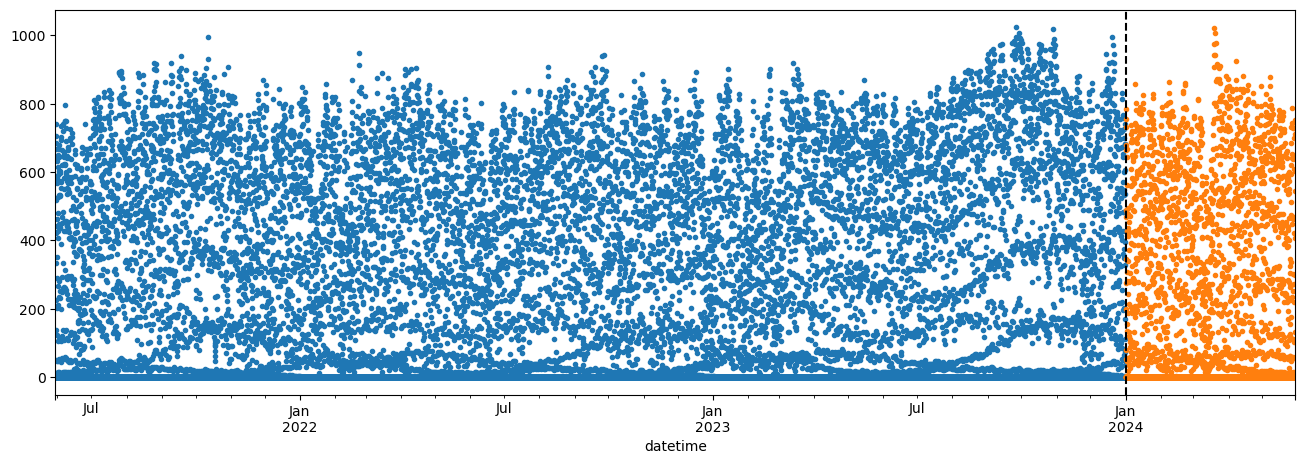

In [26]:
train = new_df.loc[new_df.index < '01-01-2024']
test = new_df.loc[new_df.index >= '01-01-2024']

fig, ax = plt.subplots(figsize=(16,5))
train['ALLSKY_SFC_SW_DWN'].plot(ax=ax , label='train',style='.')
test['ALLSKY_SFC_SW_DWN'].plot(ax=ax, label='test',style='.')
ax.axvline('01-01-2024',color='black',ls='--')
plt.show()

In [27]:
def create_features(df):
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  return df

In [28]:
data_df = create_features(new_df)
data_df.head()

,ALLSKY_SFC_SW_DWN,PS,QV2M,T2M,time,hour,dayofweek,quarter,month,year,dayofyear
datetime,,,,,,,,,,,
2021-05-30 00:00:00,0.0,91.02,16.27,20.66,2021053000,0,6,2,5,2021,150
2021-05-30 01:00:00,0.0,90.95,16.11,20.50,2021053001,1,6,2,5,2021,150
2021-05-30 02:00:00,0.0,90.90,15.94,20.29,2021053002,2,6,2,5,2021,150
2021-05-30 03:00:00,0.0,90.89,15.71,20.01,2021053003,3,6,2,5,2021,150
2021-05-30 04:00:00,0.0,90.92,15.48,19.77,2021053004,4,6,2,5,2021,150


In [29]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2021-05-30 00:00:00 to 2024-05-29 23:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ALLSKY_SFC_SW_DWN  26304 non-null  float64
 1   PS                 26304 non-null  float64
 2   QV2M               26304 non-null  float64
 3   T2M                26304 non-null  float64
 4   time               26304 non-null  object 
 5   hour               26304 non-null  int32  
 6   dayofweek          26304 non-null  int32  
 7   quarter            26304 non-null  int32  
 8   month              26304 non-null  int32  
 9   year               26304 non-null  int32  
 10  dayofyear          26304 non-null  int32  
dtypes: float64(4), int32(6), object(1)
memory usage: 1.8+ MB


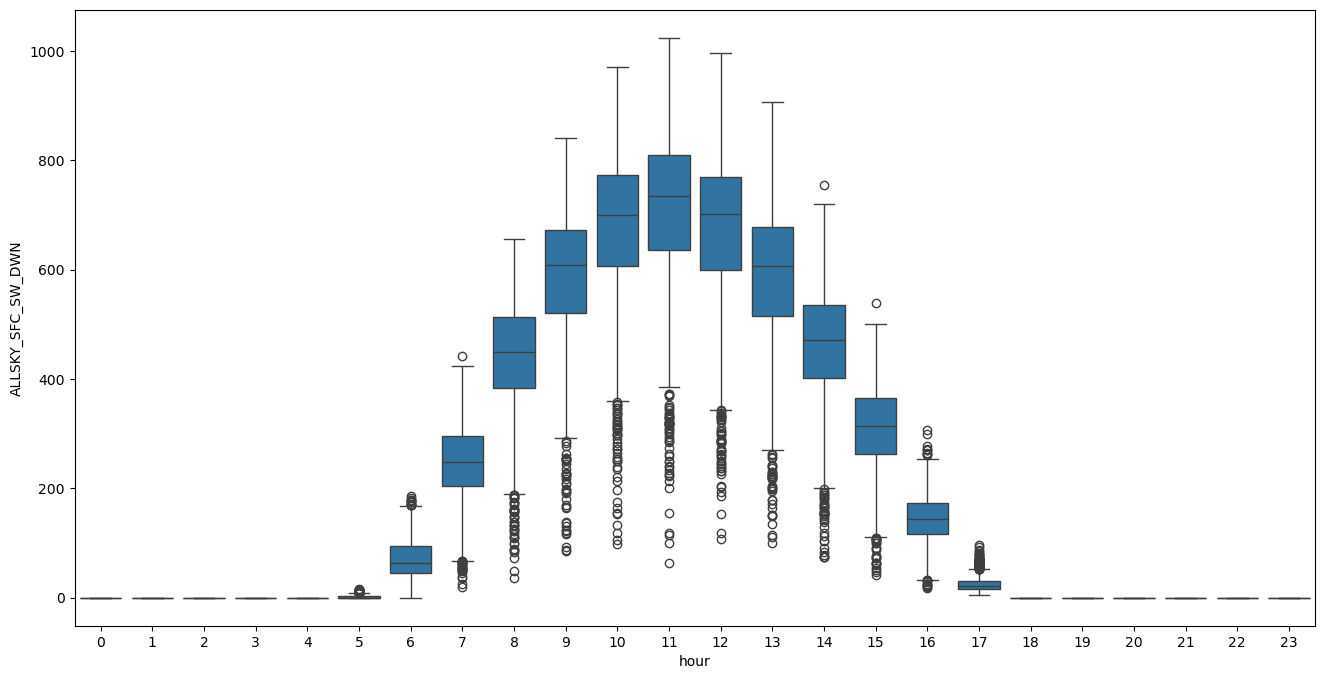

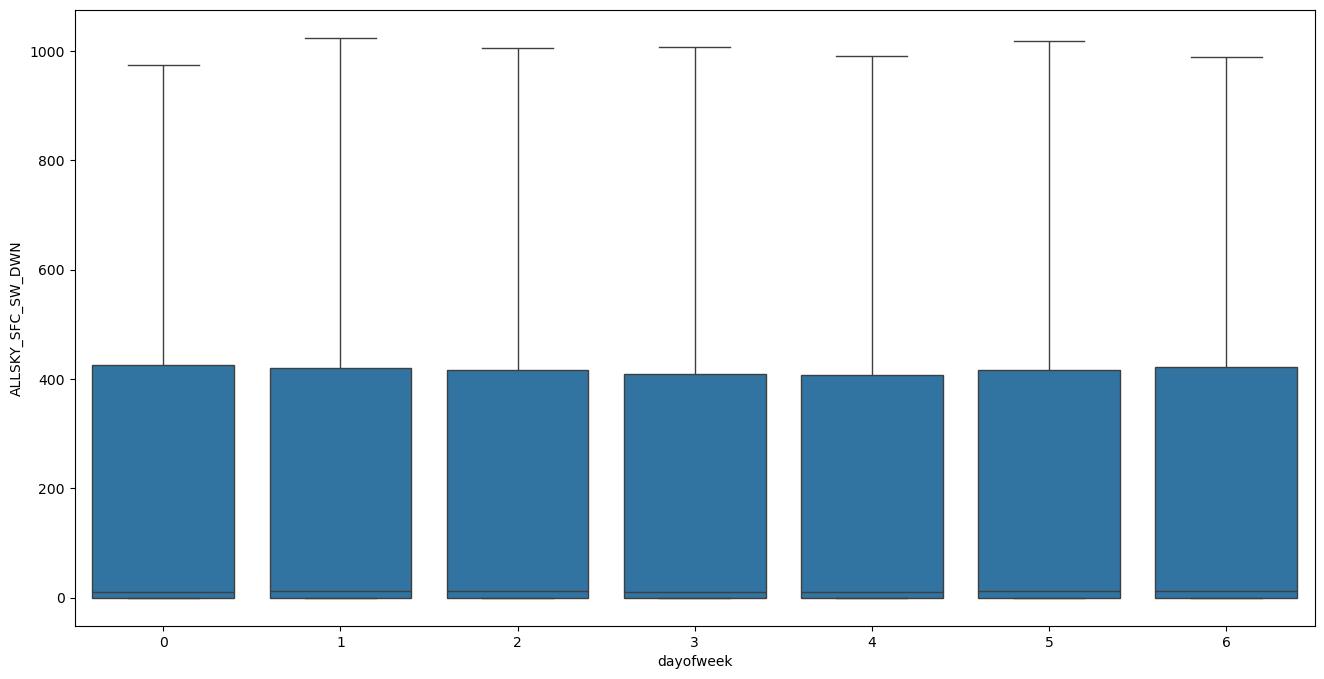

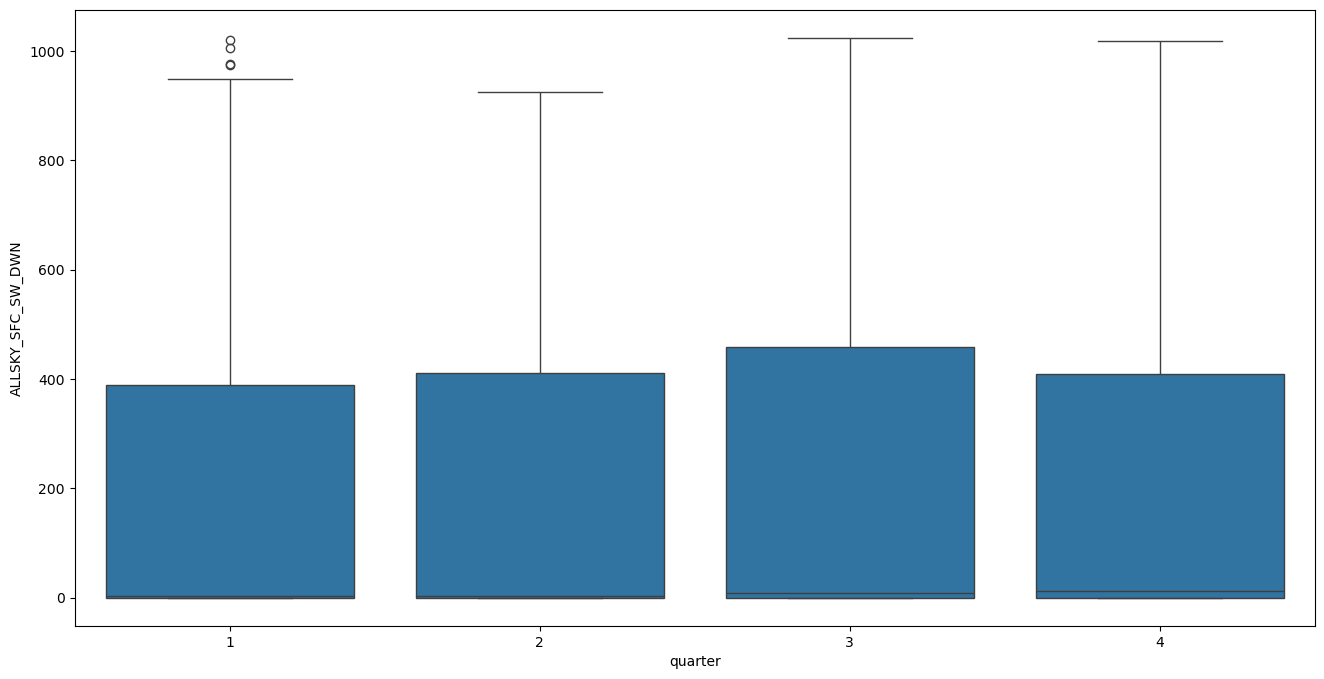

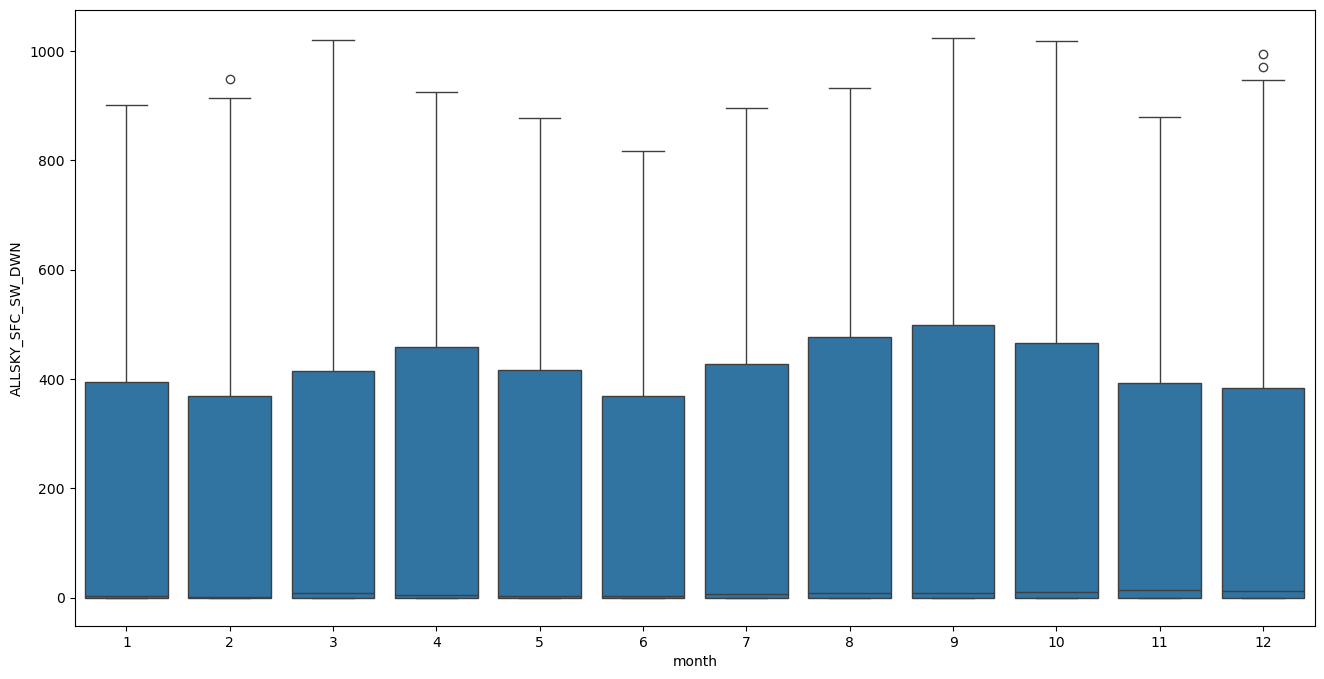

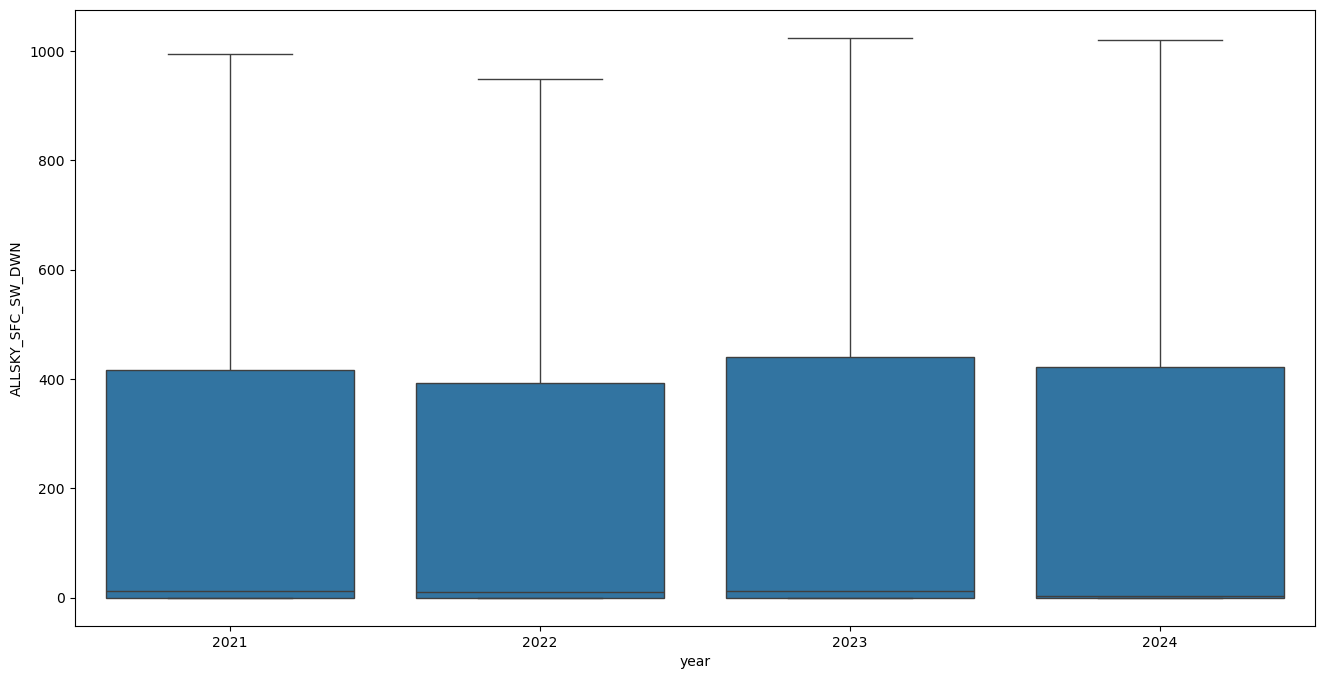

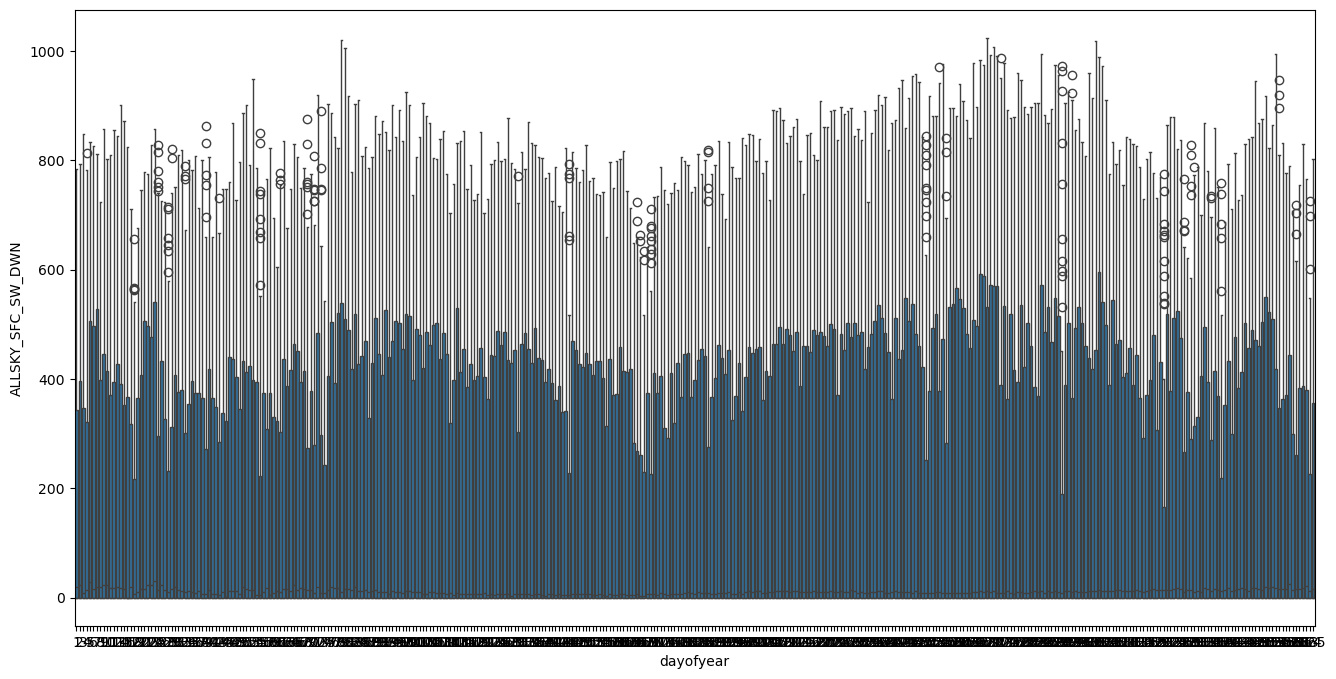

In [30]:
column = ['hour','dayofweek','quarter','month','year','dayofyear']
for i in column:
  fig, ax = plt.subplots(figsize=(16,8))
  sns.boxplot(data=data_df, x =i,y='ALLSKY_SFC_SW_DWN')
  plt.show()

In [31]:
Q1 = data_df['ALLSKY_SFC_SW_DWN'].quantile(0.25)
Q3 = data_df['ALLSKY_SFC_SW_DWN'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [32]:
median = data_df['ALLSKY_SFC_SW_DWN'].median()
data_df['ALLSKY_SFC_SW_DWN'] = np.where((data_df['ALLSKY_SFC_SW_DWN'] < lower_bound) | (data_df['ALLSKY_SFC_SW_DWN'] > upper_bound), median, data_df['ALLSKY_SFC_SW_DWN'])


In [ ]:

data_df['ALLSKY_SFC_SW_DWN'] = data_df.groupby('hour')['ALLSKY_SFC_SW_DWN'].transform(
    lambda x: winsorize(x, limits=[0.05, 0.05]))  # Membatasi 5% nilai ekstrim

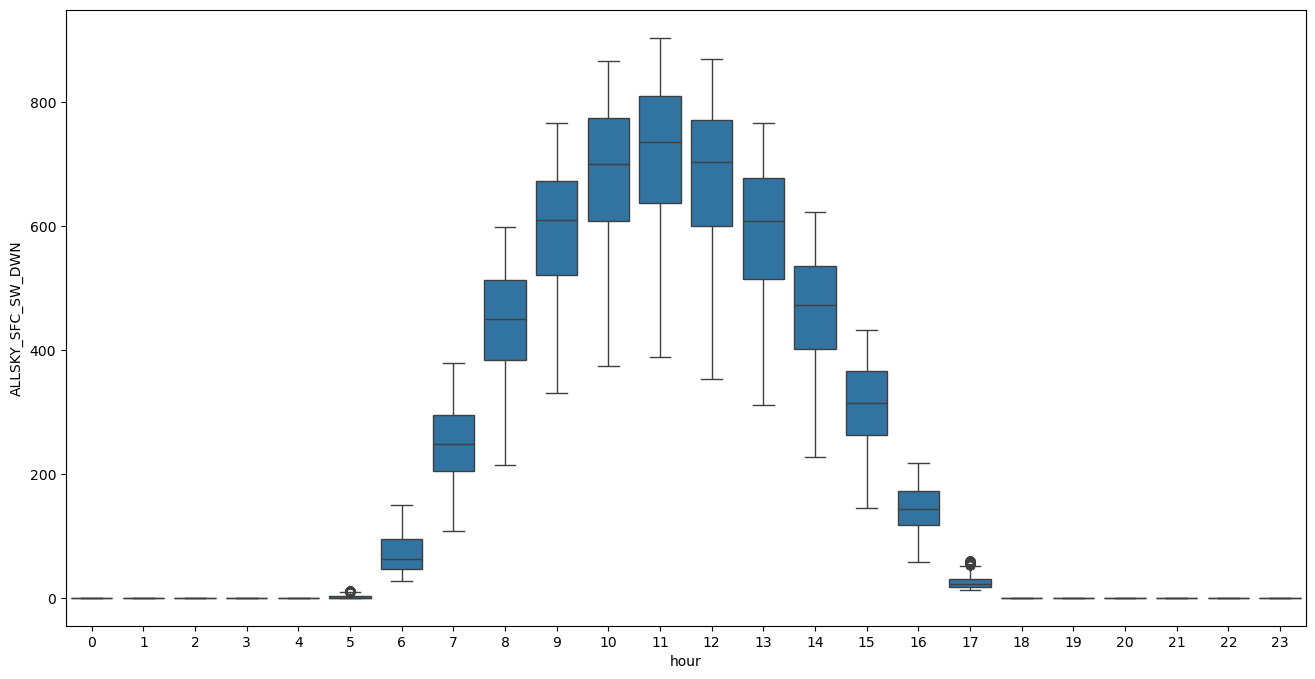

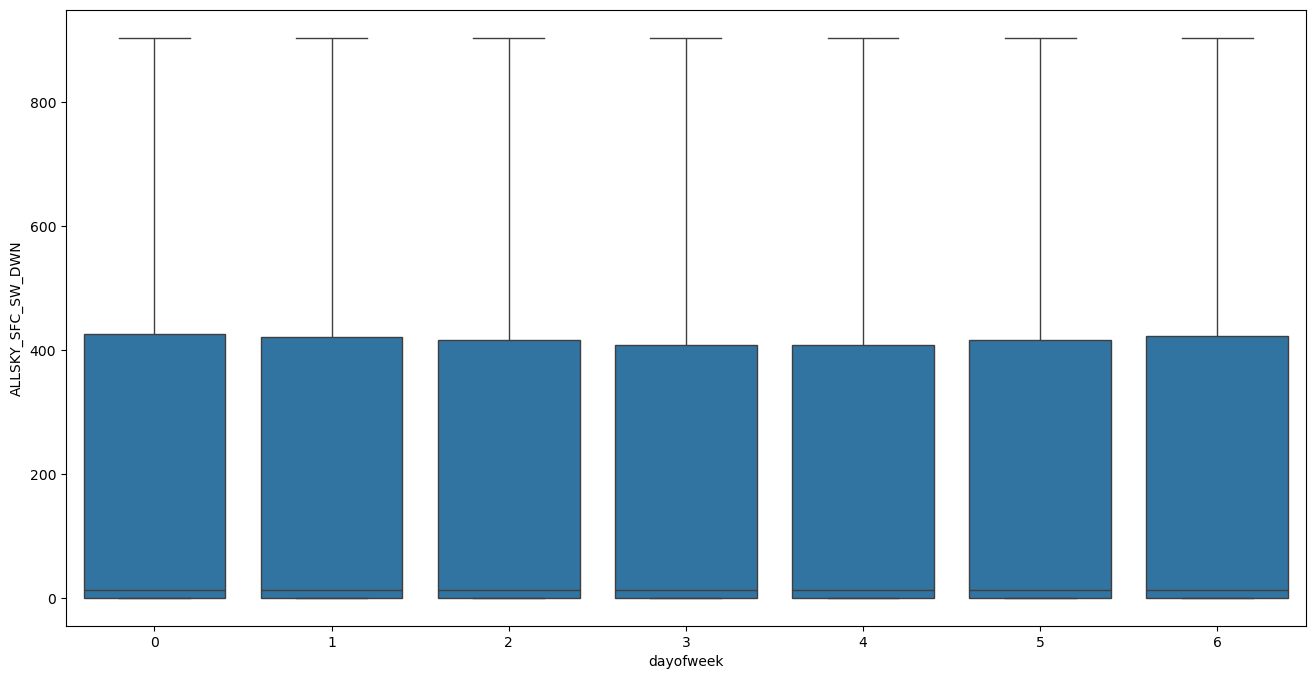

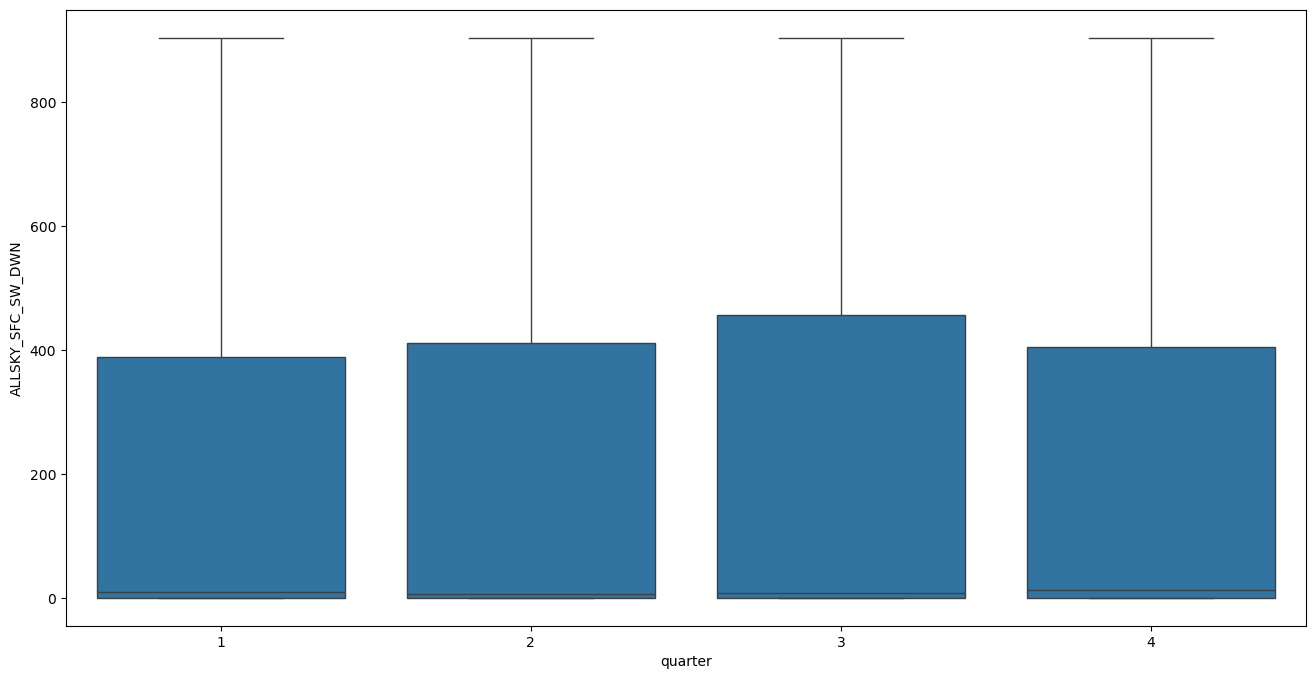

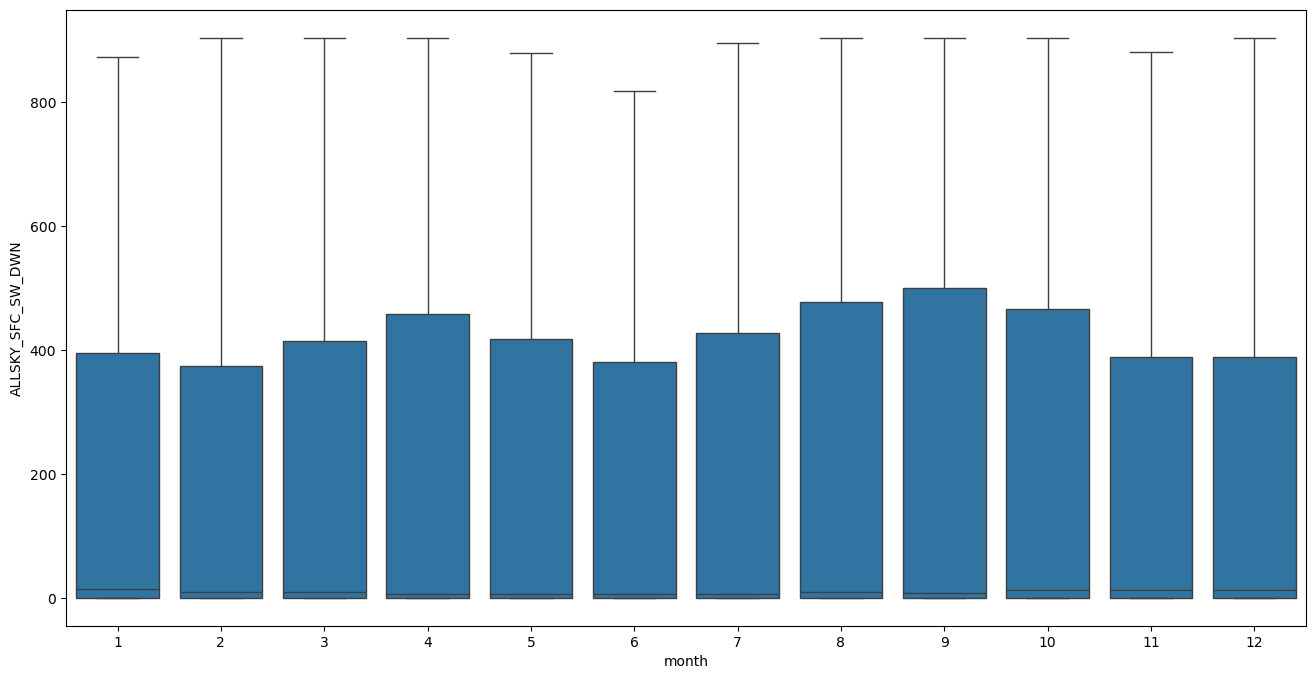

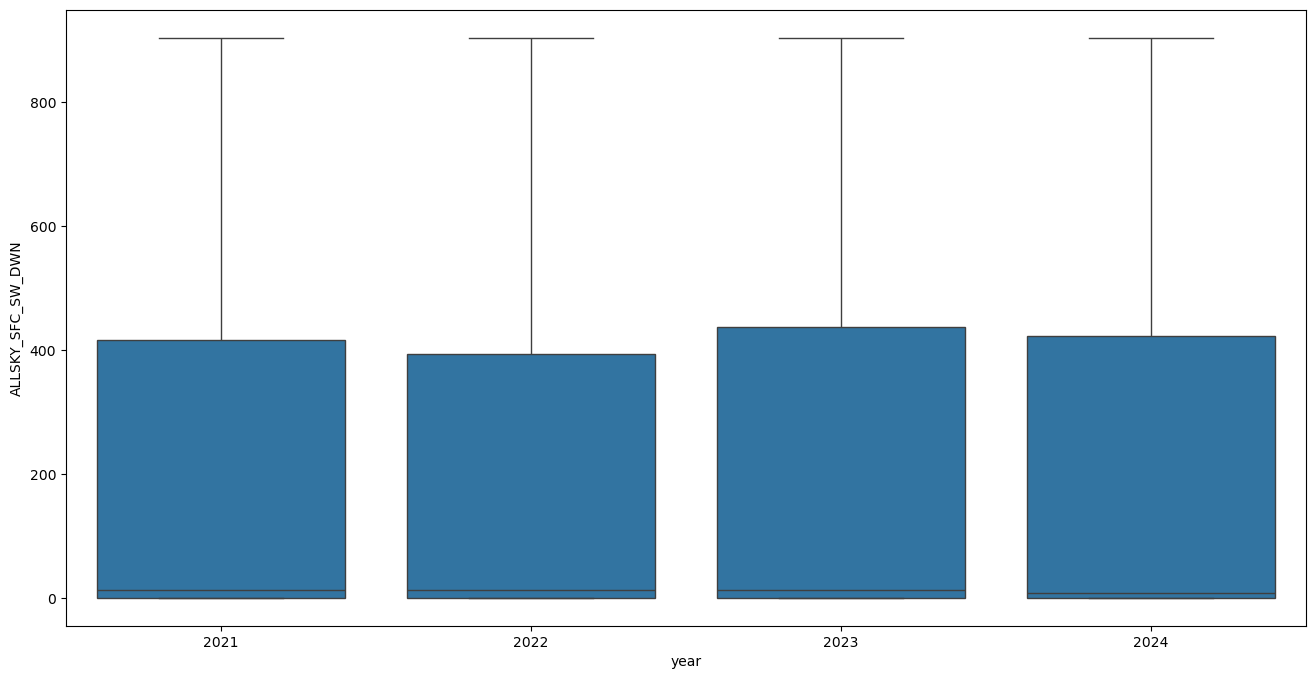

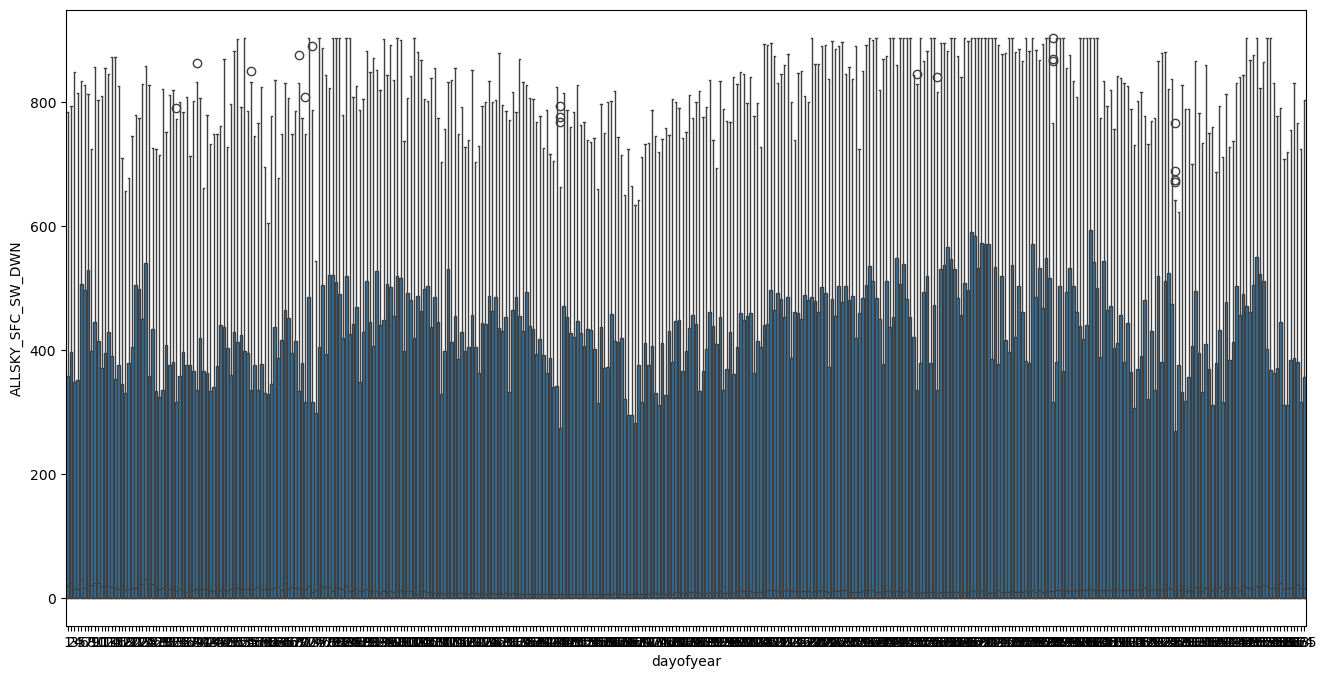

In [35]:
column = ['hour','dayofweek','quarter','month','year','dayofyear']
for i in column:
  fig, ax = plt.subplots(figsize=(16,8))
  sns.boxplot(data=data_df, x =i,y='ALLSKY_SFC_SW_DWN')
  plt.show()

In [36]:
data_df.to_csv('irradiance_dataset', encoding='utf-8', index=False)